In [1]:
import pandas as pd
import sklearn.preprocessing as skp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# TITLE HERE

## To Add: INTRO, OBJECTIVE, Explain meaning of dataset columns

## Data Retrieval

In [2]:
df = pd.read_csv('heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Exploration

1. Check data type of each column and total number of rows

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


2. Check the number of rows and columns in the dataset

In [4]:
df.shape

(918, 12)

3. Check basic statistics for continuous data columns

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


4. Checking for null values in the dataset

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Checking for Outliers
Using visualization to identify outliers

### 1. Checking Cholesterol for Outliers

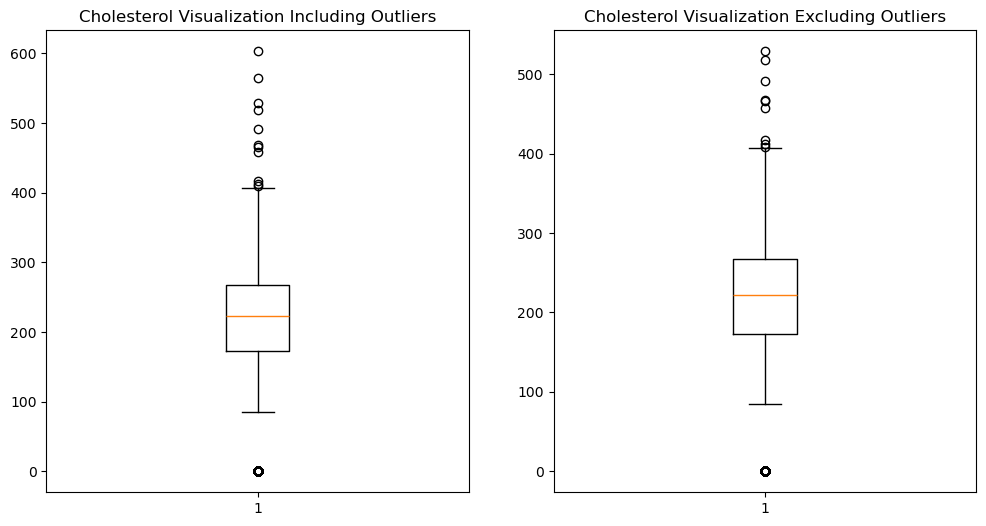

In [7]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)

axes[0].boxplot(data=df, x='Cholesterol')
axes[0].set_title('Cholesterol Visualization Including Outliers')

axes[1].boxplot(df[(df.Cholesterol<=550)]['Cholesterol'])
axes[1].set_title('Cholesterol Visualization Excluding Outliers');

#### Decision: We will remove cholestrol levels greater than 550 mg/dL because cholesterol levels between 350 mg/dL to 550 mg/dL are common in people who have the genetic disorder called heterozygous familial hypercholesterolemia, which affects 1 in 250 people. We will fill the missing cholesterol (cholesterol == 0) with median cholesterol. 
Source 1: https://www.mayoclinic.org/tests-procedures/cholesterol-test/about/pac-20384601

Source 2: https://en.wikipedia.org/wiki/Familial_hypercholesterolemia

### 2. Checking Resting Blood Pressure for Outliers

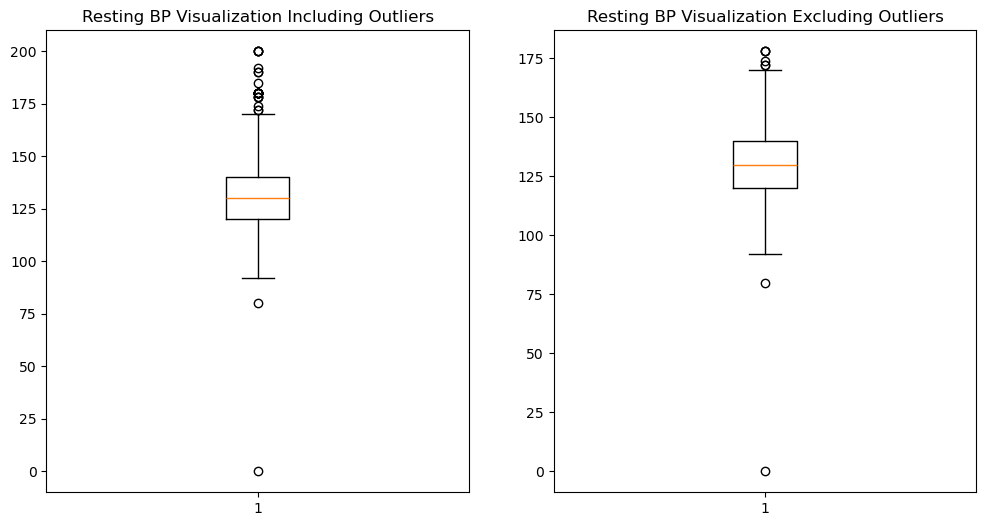

In [8]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)

axes[0].boxplot(data=df, x='RestingBP')
axes[0].set_title('Resting BP Visualization Including Outliers')

axes[1].boxplot(df[df.RestingBP<180]['RestingBP']) 
axes[1].set_title('Resting BP Visualization Excluding Outliers');

#### Decision: Blood pressure levels > 180 mm Hg is considered Hypertensive Crisis and late stage of high blood pressure. Since our study will focus on early prediction of heart disease, we will exclude blood pressure levels > 180 mm Hg.
(https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)

### 3. Checking Max Heart Rate for Outliers

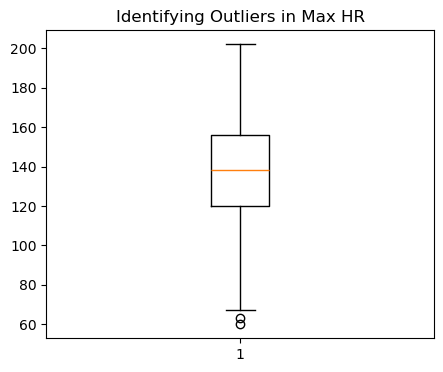

In [9]:
fig=plt.figure(figsize=(5,4))
plt.boxplot(df.MaxHR) 
plt.title('Identifying Outliers in Max HR');


#### Decision: Since the boxplot does not have many outliers and heart rates between 60 and 70 is within reasonable range for adults, so we will keep these data.

### 4. Distribution of Age

/Users/jessicahc/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness of Age: -0.19561273124487544


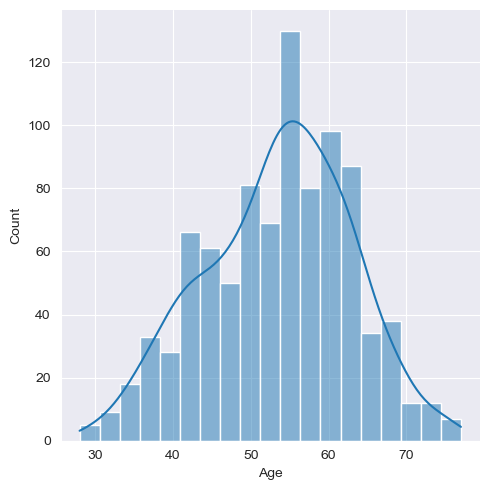

In [10]:
sns.set_style('darkgrid')
sns.displot(df, x='Age', kde=True);
skewness=stats.skew(df['Age'])
print('Skewness of Age:', skewness)

The distribution of Age values is close to normal since the skewness is almost 0.

In [11]:
# NOT SURE
df[['RestingBP', 'MaxHR', 'Cholesterol', 'HeartDisease']].groupby('HeartDisease').agg('mean')

,RestingBP,MaxHR,Cholesterol
HeartDisease,,,
0,130.180488,148.151220,227.121951
1,134.185039,127.655512,175.940945


## Pre-processing

### Removing Outliers

- remove rows with Cholesterol > 550 mg/dL
- remove rows with RestingBP > 180 mm Hg

In [12]:
df=df[(df.Cholesterol<=550)]
df=df[df.RestingBP<=180]

### Handling Missing Values

1. Replace missing cholesterol values (Cholesterol == 0) with median cholesterol value

In [13]:
c=df['Cholesterol']
c_median=c[c>0].median()
df['Cholesterol']=df['Cholesterol'].replace(0,c_median)

2. Replace missing resting blood pressure value (RestingBP == 0) with median resting blood pressure value 

In [14]:
rbp_median=df[df.RestingBP!=0]['RestingBP'].median() 
df['RestingBP']=df['RestingBP'].replace(0,rbp_median)

### Data Binning and Mapping
1. Using MaxHR to create a new categorical column

In [15]:
df['MaxHR Level'] = skp.KBinsDiscretizer(n_bins=5, encode='ordinal').fit_transform(df['MaxHR'].values.reshape(-1, 1))

In [16]:
df['MaxHR Level'].replace(0, 'Low', inplace=True)
df['MaxHR Level'].replace(1, 'Low-Mid', inplace=True)
df['MaxHR Level'].replace(2, 'Mid', inplace=True)
df['MaxHR Level'].replace(3, 'Mid-High', inplace=True)
df['MaxHR Level'].replace(4, 'High', inplace=True)

In [17]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,MaxHR Level
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,High
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Mid-High
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Low
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Low
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Low-Mid


2. Map RestingBP values to different blood pressure stages. 
- Normal: < 120 mm Hg
- Elevated: 120- 129 mm Hg
- Hypertension Stage 1: 130 - 139 mm Hg
- Hypertension Stage 2: 140 - 180 mm Hg

(https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)

In [18]:
def bpGroup(bp):
    if (bp<120):
        return('Normal')
    elif (bp>=120 and bp<=129):
        return('Elevated')
    elif (bp>=130 and bp<=139):
        return('Hypertension S1')
    else:
        return('Hypertension S2')
    
df['BP_Stage']=df['RestingBP'].apply(bpGroup)

3. Map Age values to different age groups.

In [19]:
def ageGroup(a):
    if (a>=30 and a<40):
        return('30 - 39')
    elif (a>=40 and a<50):
        return('40 - 49')
    elif (a>=50 and a<60):
        return('50 - 59')
    elif (a>=60 and a<70):
        return('60 - 69')
    elif (a>=70 and a<80):
        return('70 - 79')
    else:
        return('80+')
    
df['AgeGroup']=df['Age'].apply(ageGroup)

4. For HeartDisease column, map 0 to 'no' and 1 to 'yes'.

In [20]:
df['HeartDisease']=df['HeartDisease'].replace(0,'No')
df['HeartDisease']=df['HeartDisease'].replace(1,'Yes')

5. For FastingBS column, map 0 to 'Normal' and 1 to 'Elevated' (ADD SOURCE)

In [21]:
df['FastingBS']=df['FastingBS'].replace(0,'Normal')
df['FastingBS']=df['FastingBS'].replace(1,'Elevated')

### Normalization

In [22]:
# NORMALIZATION IS USEFUL FOR DOING KMEANS
# CAN ADD WHEN WE GET UP TO THE MACHINE LEARNING SECTION

## Analysis

### Relationship between fasting blood sugar level and heart disease

In [23]:
bsdf=df.pivot_table(index='HeartDisease', columns='FastingBS', aggfunc='size')
bsdf['Total']=df.groupby('HeartDisease').agg('size')
bsdf['%_of_Elevated']=bsdf.Elevated/bsdf.Total*100
bsdf['%_of_Normal']=bsdf.Normal/bsdf.Total*100
bsdf

FastingBS,Elevated,Normal,Total,%_of_Elevated,%_of_Normal
HeartDisease,,,,,
No,44,364,408,10.784314,89.215686
Yes,166,334,500,33.200000,66.800000


In [24]:
total_elevated=sum(bsdf.Elevated)
pct_hd_elevated=(bsdf.loc['Yes', 'Elevated']/total_elevated)*100
print('Percent of patients with elevated blood sugar levels who developed heart disease: %.2f'%pct_hd_elevated,'%')

Percent of patients with elevated blood sugar levels who developed heart disease: 79.05 %


Insight: Among the patients without heart disease, 10.7% of them have elevated fasting blood sugar levels (>120 mg/dL). Among the patients with heart disease, 33.3% of them have elevated fasting blood sugar levels. Nearly 80% of patients with elevated blood sugar levels have developed heart disease. This means fasting blood sugar levels can be a good indicator of heart disease.

### Relationship between blood pressure and heart disease

In [25]:
bpdf=df.pivot_table(index='HeartDisease', columns='BP_Stage', aggfunc='size')
bpdf['Total']=df.groupby('HeartDisease').agg('size')
bpdf['%_of_Hypertension_S2']=(bpdf['Hypertension S2']/bpdf.Total)*100
bpdf

BP_Stage,Elevated,Hypertension S1,Hypertension S2,Normal,Total,%_of_Hypertension_S2
HeartDisease,,,,,,
No,108,107,121,72,408,29.656863
Yes,106,109,198,87,500,39.600000


In [26]:
total_h2=sum(bpdf['Hypertension S2'])
pct_hd_h2=(bpdf.loc['Yes', 'Hypertension S2']/total_h2)*100
print('Percent of patients with hypertension stage 2 who developed heart disease: %.2f'%pct_hd_h2,'%')

Percent of patients with hypertension stage 2 who developed heart disease: 62.07 %


Insight: The pivot table above shows blood pressure levels of 2 groups of people - group 1 has no heart disease, group 2 has heart disease. The number of people with elevated or hypertension stage 1 blood pressure levels are about the same between the 2 groups. Among the people without heart disease, 29.7% of them have hypertension stage 2. Among the people with heart disease, nearly 40% of them have hypertension stage 2, which is 10% more than the group without heart disease. Among all the people who have hypertension stage 2, more than 60% of them have developed heart disease. This means blood pressure with hypertension stage 2 can be a good indicator for predicting heart disease.

## Visualizations

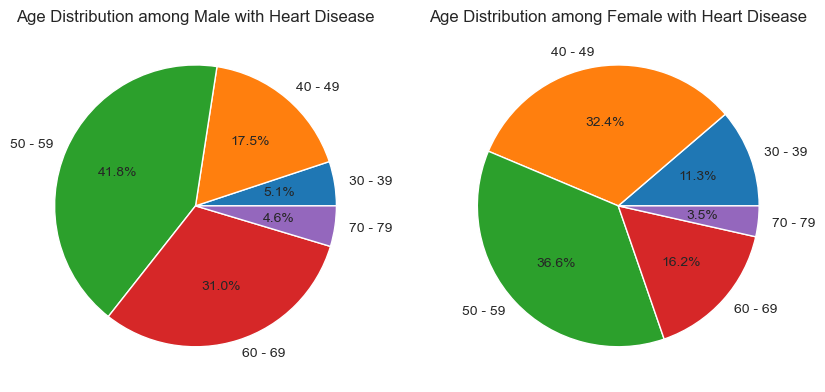

In [27]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(6)

mdf = df[(df.HeartDisease=='Yes') & (df.Sex=='M')].groupby('AgeGroup').agg('size')
axes[0].pie(mdf, labels=mdf.index, autopct='%1.1f%%')
axes[0].set_title('Age Distribution among Male with Heart Disease')

fdf = df[(df.HeartDisease=='No') & (df.Sex=='F')].groupby('AgeGroup').agg('size')
axes[1].pie(fdf, labels=fdf.index, autopct='%1.1f%%')
axes[1].set_title('Age Distribution among Female with Heart Disease');

2. Show relationships between Oldpeak, ST_Slope, heart disease --> help doctors utilize ST Depression curve to predict Heart Disease

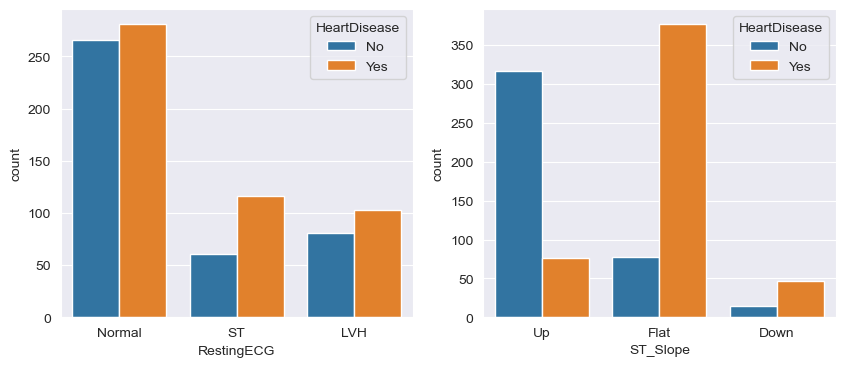

In [28]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
sns.countplot(df, x='RestingECG', hue='HeartDisease', ax=ax[0])
sns.countplot(df, x='ST_Slope', hue='HeartDisease', ax=ax[1]);

/Users/jessicahc/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jessicahc/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jessicahc/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jessicahc/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

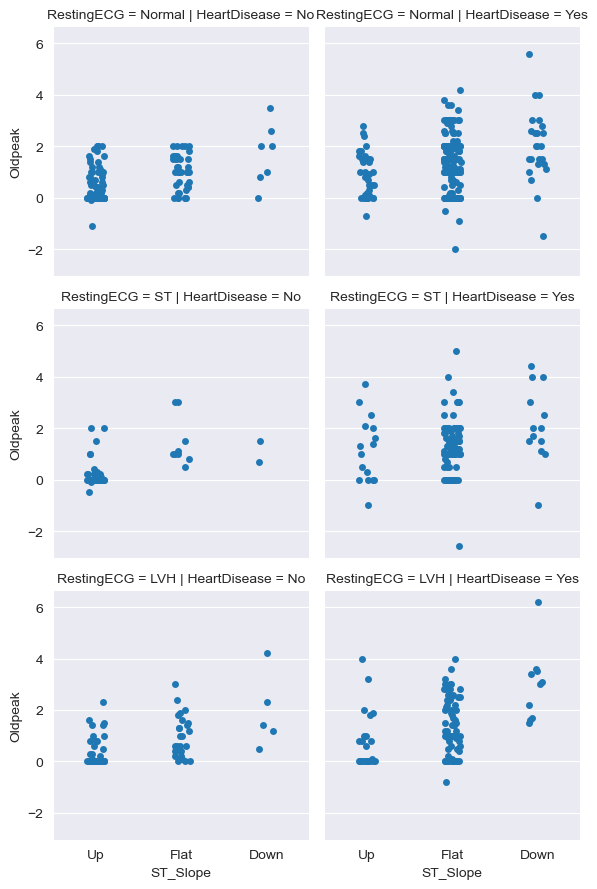

In [34]:
x_order=df.ST_Slope.unique()
sns.FacetGrid(data=df, col='HeartDisease', row='RestingECG').map(sns.stripplot, 'ST_Slope', 'Oldpeak', order=x_order);

In [30]:
# sns.set_style('darkgrid')
# sns.displot(data=df, x='Age', hue='HeartDisease');

In [31]:
# sns.kdeplot(data=df[df.Sex=='F'], x='Age', hue='HeartDisease');

In [32]:
# sns.kdeplot(data=df[df.Sex=='M'], x='Age', hue='HeartDisease', fill=True);